In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

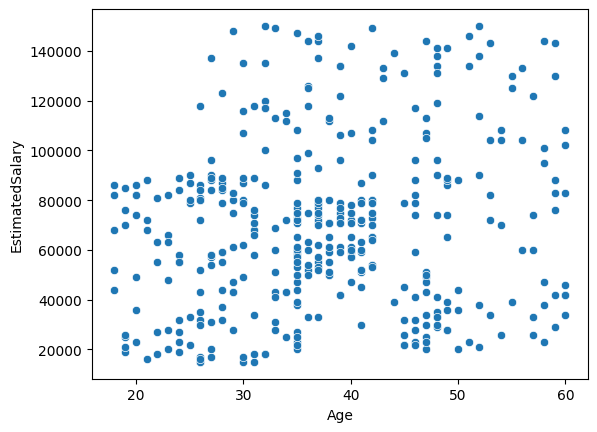

In [6]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6655 - loss: 1867.4923 - val_accuracy: 0.4000 - val_loss: 634.4337
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3658 - loss: 544.3867 - val_accuracy: 0.6000 - val_loss: 498.8561
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6028 - loss: 292.5149 - val_accuracy: 0.4000 - val_loss: 68.8807
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5840 - loss: 122.5064 - val_accuracy: 0.6000 - val_loss: 14.2530
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5648 - loss: 27.2133 - val_accuracy: 0.6000 - val_loss: 9.1700
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5096 - loss: 35.4842 - val_accuracy: 0.4000 - val_loss: 121.3105
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4697 - loss: 103.8016 - val_accuracy: 0.6000 - val_loss: 44.0960
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5940 - loss: 40.

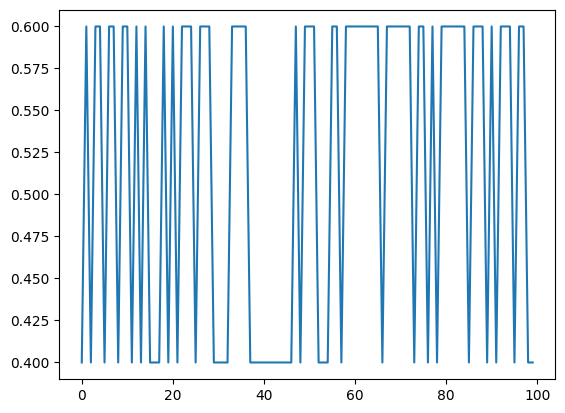

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

### Applying scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3580 - loss: 0.7232 - val_accuracy: 0.9000 - val_loss: 0.6710
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8543 - loss: 0.6604 - val_accuracy: 0.8500 - val_loss: 0.6070
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8953 - loss: 0.5970 - val_accuracy: 0.8250 - val_loss: 0.5531
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8715 - loss: 0.5553 - val_accuracy: 0.8250 - val_loss: 0.5097
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8944 - loss: 0.4988 - val_accuracy: 0.8125 - val_loss: 0.4722
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8458 - loss: 0.4867 - val_accuracy: 0.8125 - val_loss: 0.4414
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8578 - loss: 0.4573 - val_accuracy: 0.8125 - val_loss: 0.4160
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8682 - loss: 0.4231 - val_accuracy: 0.8250 - val_l